# 用 Python 撰寫程式分別從證券交易所、Yahoo奇摩爬取股價資料，並進行可視化。

取得證交所資料

1. 進入證交所網址：https://www.twse.com.tw/zh/index.html

2. 使用開發者模式取得請求資料網址

In [1]:
import requests
import pandas as pd
import datetime as dt

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 設定中文字體（你可以根據系統中已安裝的字體進行調整）
font_path = '/content/drive/MyDrive/Colab Notebooks/台北黑体TaipeiSansTCBeta-Regular.ttf'  # 替換為字體文件的實際路徑
font_prop = fm.FontProperties(fname=font_path)

1️⃣ 取得證交所上市公司個股日成交資訊

In [14]:
stock_id = '2330'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20240921


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/09/02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.00,+4.00,"31,642"
1,113/09/03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.00,-8.00,"47,139"
2,113/09/04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.00,-51.00,"393,210"
3,113/09/05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.00,+13.00,"63,902"
4,113/09/06,"28,248,063","25,786,016,936",909.00,918.00,903.00,918.00,+16.00,"38,415"
5,113/09/09,"38,448,946","34,456,838,126",892.00,900.00,891.00,899.00,-19.00,"102,365"
6,113/09/10,"34,312,646","31,067,424,234",907.00,911.00,901.00,904.00,+5.00,"45,141"
7,113/09/11,"19,513,256","17,621,000,956",906.00,906.00,900.00,901.00,-3.00,"30,789"
8,113/09/12,"43,749,260","40,999,951,508",936.00,944.00,928.00,940.00,X0.00,"80,643"
9,113/09/13,"28,307,441","26,795,862,243",955.00,955.00,939.00,947.00,+7.00,"39,071"


收盤價走勢圖

<ipython-input-17-6afdac815e50>:11: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6afdac815e50>:11: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  plt.tight_layout()
<ipython-input-17-6afdac815e50>:11: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{CJK UNIFIED IDEOGRAPH-76E4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20729 (\N{CJK UNIFIED IDEOGRAPH-50F9}) missing from current font.
  fig.canvas.print_

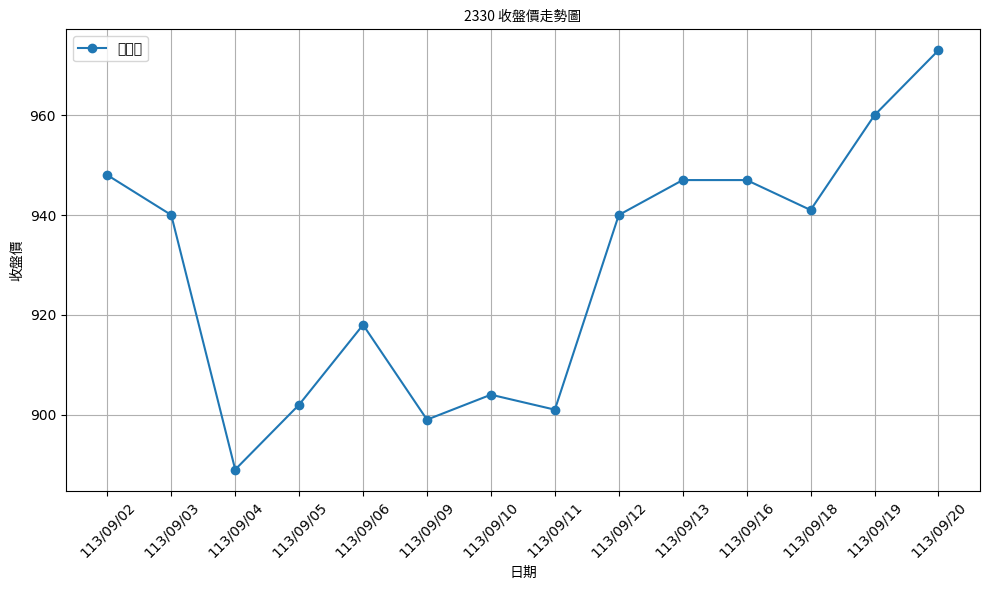

In [17]:
import matplotlib.pyplot as plt
# 收盤價走勢圖
plt.figure(figsize=(10, 6))
plt.plot(df['日期'], df['收盤價'].astype(float), marker='o', label='收盤價')
plt.title(f'{stock_id} 收盤價走勢圖', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('收盤價', fontproperties=font_prop)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

2️⃣ 抓取特定某段時間區間

In [18]:
def convert_minguo_to_ad(date_str):
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

In [19]:
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2024/09/2'
end_date = '2024/09/5'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

filtered_df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,2024-09-02,"19,272,593","18,270,058,260",950.00,955.00,943.00,948.00,+4.00,"31,642"
1,2024-09-03,"23,205,623","21,908,471,541",948.00,952.00,939.00,940.00,-8.00,"47,139"
2,2024-09-04,"93,169,835","83,424,133,824",894.00,905.00,888.00,889.00,-51.00,"393,210"
3,2024-09-05,"34,147,890","30,998,595,394",907.00,915.00,900.00,902.00,+13.00,"63,902"


3️⃣ 取得連續月份資料

In [20]:
# 設定查找時間
date_list = ['20240701', '20240801', '20240901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        stock_data = requests.get(url)
        json_data = stock_data.json()
        df = pd.DataFrame(data=json_data['data'],columns=json_data['fields'])

        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        print(f'無法取得{date}的資料, 可能資料量不足.')

print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   113年07月01日   1.34   112  29.30  6.90  113/1
1   113年07月02日   1.35   112  29.06  6.85  113/1
2   113年07月03日   1.33   112  29.63  6.98  113/1
3   113年07月04日   1.29   112  30.42  7.17  113/1
4   113年07月05日   1.29   112  30.42  7.17  113/1
5   113年07月08日   1.26   112  31.33  7.38  113/1
6   113年07月09日   1.25   112  31.48  7.42  113/1
7   113年07月10日   1.24   112  31.63  7.45  113/1
8   113年07月11日   1.20   112  32.69  7.70  113/1
9   113年07月12日   1.25   112  31.48  7.42  113/1
10  113年07月15日   1.25   112  31.48  7.42  113/1
11  113年07月16日   1.23   112  31.93  7.53  113/1
12  113年07月17日   1.26   112  31.17  7.35  113/1
13  113年07月18日   1.29   112  30.42  7.17  113/1
14  113年07月19日   1.34   112  29.36  6.92  113/1
15  113年07月22日   1.38   112  28.42  6.70  113/1
16  113年07月23日   1.33   112  29.63  6.98  113/1
17  113年07月26日   1.41   112  27.97  6.59  113/1
18  113年07月29日   1.38   112  28.57  6.73  113/1
19  113年07月30日   1.38   112  28.45  6.71

本益比趨勢

<ipython-input-21-a6f031137cbb>:15: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
<ipython-input-21-a6f031137cbb>:15: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  plt.tight_layout()
<ipython-input-21-a6f031137cbb>:15: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  plt.tight_layout()
<ipython-input-21-a6f031137cbb>:15: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  plt.tight_layout()
<ipython-input-21-a6f031137cbb>:15: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from current font.
  plt.tight_layout()
<ipython-input-21-a6f031137cbb>:15: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from curre

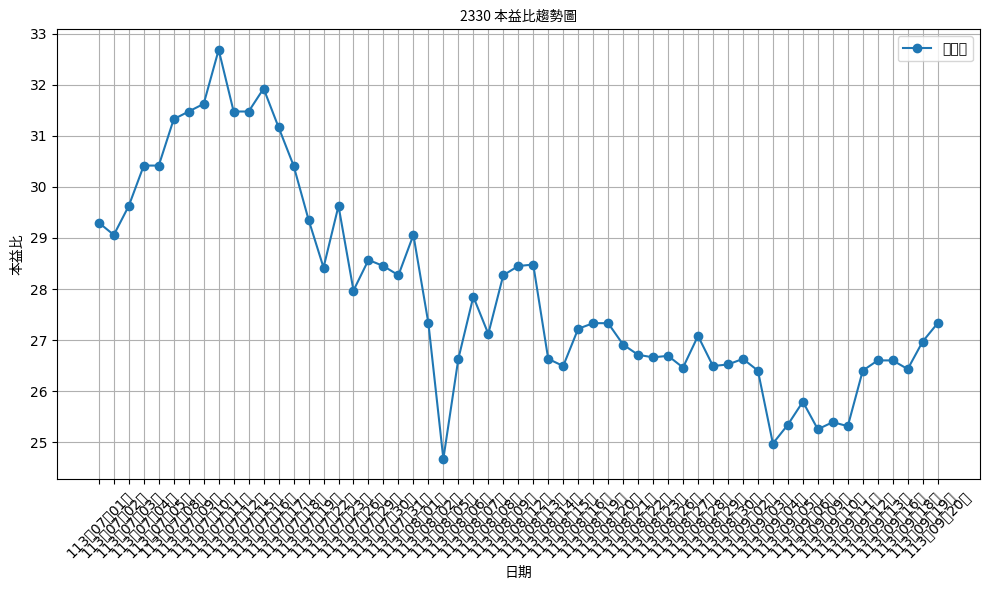

In [21]:
import matplotlib.pyplot as plt

# 去除逗號並將 '本益比' 轉換為 float 型別
all_df['本益比'] = all_df['本益比'].str.replace(',', '').astype(float)

# 繪製本益比趨勢圖
plt.figure(figsize=(10, 6))
plt.plot(all_df['日期'], all_df['本益比'], marker='o', label='本益比')
plt.title(f'{stock_id} 本益比趨勢圖', fontproperties=font_prop)
plt.xlabel('日期', fontproperties=font_prop)
plt.ylabel('本益比', fontproperties=font_prop)
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 用 BeautifulSoup4 取得 Yahoo 股市資料

In [22]:
from datetime import datetime
from bs4 import BeautifulSoup

取得當日股價

In [23]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

stock_id = '2330'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2024/09/20 14:30,2330,973,981,982,971,975,585.83,960,1.35%,13.00,"60,066","32,674",1.15%


取得季報表資訊

In [24]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '2330', 'income-statement']
income-statement


In [25]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
df = url_find(url).transpose()

# 資料處理
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# 輸出資料後5筆
print(df)

      年度/季別        營業現金流         投資現金流         融資現金流        自由現金流  \
0   2024 Q2  377,668,210  -197,607,330   -90,244,583  180,060,880   
1   2024 Q1  436,311,108  -159,806,991   -71,685,617  276,504,117   
2   2023 Q4  394,829,347  -132,319,502   -75,367,133  262,509,845   
3   2023 Q3  294,645,276  -242,243,223   -38,451,204   52,402,053   
4   2023 Q2  167,247,979  -259,326,076   -26,588,885  -92,078,097   
5   2023 Q1  385,244,745  -272,231,795   -64,487,030  113,012,950   
6   2022 Q4  486,881,904  -342,532,013   -69,831,545  144,349,891   
7   2022 Q3  412,698,167  -284,390,325  -130,406,753  128,307,842   
8   2022 Q2  338,849,429  -275,932,106    19,080,454   62,917,323   
9   2022 Q1  372,169,688  -288,073,791   -19,086,188   84,095,897   
10  2021 Q4  378,199,317  -245,343,292    82,284,018  132,856,025   
11  2021 Q3  318,706,207  -177,020,159   -35,324,719  141,686,048   
12  2021 Q2  187,439,492  -169,750,998    75,030,682   17,688,494   
13  2021 Q1  227,815,706  -244,251

In [32]:
# 列出所有欄位名稱
print(df.columns)

Index(['年度/季別', '營業現金流', '投資現金流', '融資現金流', '自由現金流', '淨現金流'], dtype='object')


可視化現金流的趨勢圖

<ipython-input-33-b170fb576727>:34: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  plt.tight_layout()
<ipython-input-33-b170fb576727>:34: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  plt.tight_layout()
<ipython-input-33-b170fb576727>:34: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from current font.
  plt.tight_layout()
<ipython-input-33-b170fb576727>:34: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  plt.tight_layout()
<ipython-input-33-b170fb576727>:34: UserWarning: Glyph 29694 (\N{CJK UNIFIED IDEOGRAPH-73FE}) missing from current font.
  plt.tight_layout()
<ipython-input-33-b170fb576727>:34: UserWarning: Glyph 37329 (\N{CJK UNIFIED IDEOGRAPH-91D1}) missing from current font.
  plt.tight_layout()
<ipython-input-33-b170fb576727>:34: UserWarning: Glyph 27969 (\N{CJK UNIFIED IDEOGRAPH-6D41}) missing from current font.
  plt.tight_layout()
<ipyth

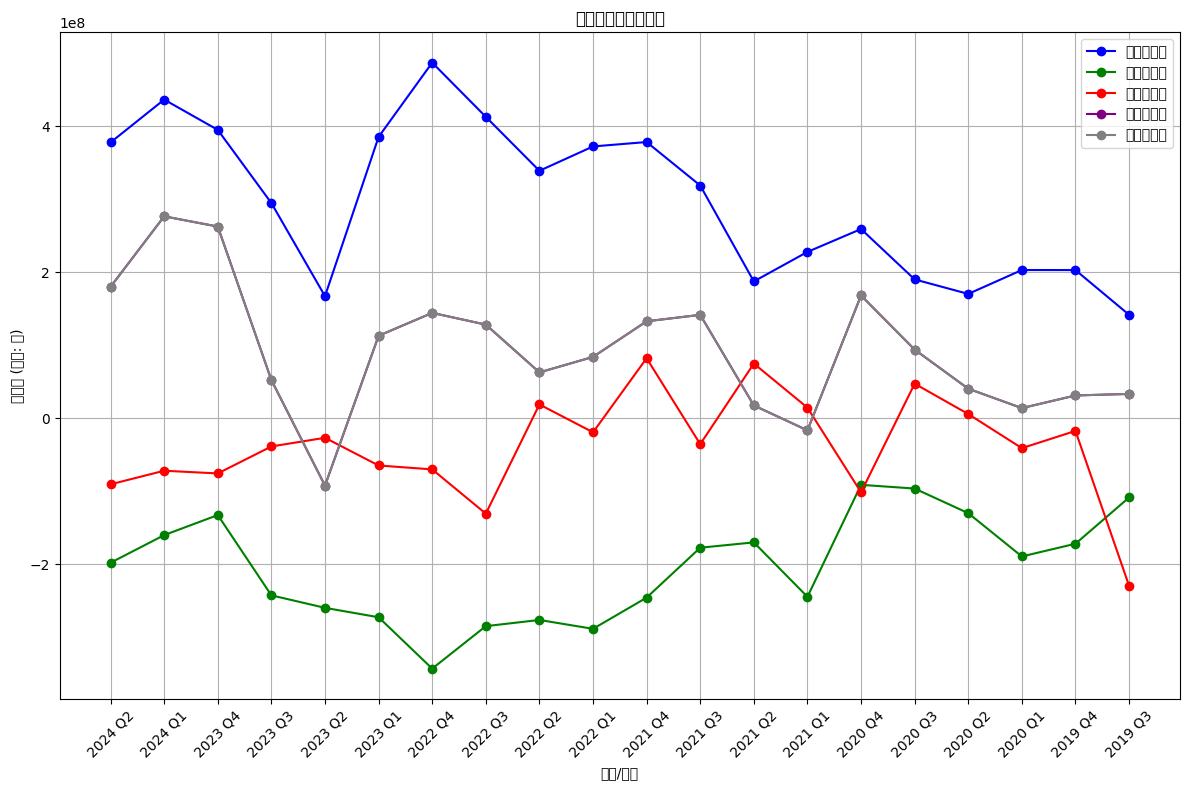

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# 定義一個函數來處理每一列的數值，確保它們是字串，並處理逗號和空值
def clean_column(column):
    return column.apply(lambda x: float(str(x).replace(',', '').replace('nan', '0')) if pd.notnull(x) else 0)

# 清理並轉換每個現金流欄位
df['營業現金流'] = clean_column(df['營業現金流'])
df['投資現金流'] = clean_column(df['投資現金流'])
df['融資現金流'] = clean_column(df['融資現金流'])
df['自由現金流'] = clean_column(df['自由現金流'])
df['淨現金流'] = clean_column(df['淨現金流'])

# 繪製多條現金流趨勢圖
plt.figure(figsize=(12, 8))

# 繪製每個現金流的折線
plt.plot(df['年度/季別'], df['營業現金流'], marker='o', label='營業現金流', color='b')
plt.plot(df['年度/季別'], df['投資現金流'], marker='o', label='投資現金流', color='g')
plt.plot(df['年度/季別'], df['融資現金流'], marker='o', label='融資現金流', color='r')
plt.plot(df['年度/季別'], df['自由現金流'], marker='o', label='自由現金流', color='purple')
plt.plot(df['年度/季別'], df['自由現金流'], marker='o', label='自由現金流', color='gray')

# 添加標題和標籤
plt.title('各類現金流趨勢分析')
plt.xlabel('年度/季別')
plt.ylabel('現金流 (單位: 萬)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# 顯示圖表
plt.show()

github

In [34]:
!git config --global user.name "陳思平"
!git config --global user.email "g112029046@mail.nchu.edu.tw"

In [ ]:
# 將程式碼克隆到 Colab
!git clone https://github.com/szupingChen/fin_hw.git
%cd your-repository

# 複製程式碼到 GitHub 本地目錄
!cp /content/drive/MyDrive/Colab Notebooks/fin_week2_hw.ipynb .

# 添加文件並提交
!git add your-notebook.ipynb
!git commit -m "Add Colab notebook"
!git push origin main